In [ ]:
import os
import sys
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

try:
  from category_encoders import HashingEncoder
except:
  !pip install category_encoders
  from category_encoders import HashingEncoder

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
data1 = pd.read_csv("/Train-In.csv")
data_results = pd.read_csv("/Train-results.csv")
data2 = pd.read_csv("/Train-Out.csv")
data3 = pd.read_csv("/Train-Ben.csv")

In [ ]:
#visualize data
data1.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
data3.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
data_results.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
print(data1.columns.tolist()==data2.columns.tolist())
# merge all dataframes
df = pd.concat([data1, data2], ignore_index=True)
print(f"Data1 size = {len(data1)}:Data2 size = {len(data2)}:df size = {len(df)}")
df = pd.merge(df,data3,on="BeneID",how="outer")

False
Data1 size = 40474:Data2 size = 517737:df size = 558211


In [ ]:
#merge result column
df = pd.merge(df,data_results,on="Provider",how="outer")

In [ ]:
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
df.drop(["BeneID","ClaimID"], axis=1, inplace=True)

In [ ]:
df.head()

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,...,1,1,2,1,1,36000,3204,60,70,Yes
1,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,...,2,1,2,2,2,24000,2136,450,200,Yes
2,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,...,2,1,2,2,2,19000,1068,100,20,Yes
3,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,...,1,1,1,1,2,27000,2136,450,160,Yes


In [ ]:
#convert date into readable format
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])
df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'])
df['DischargeDt'] = pd.to_datetime(df['DischargeDt'])
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOD'] = pd.to_datetime(df['DOD'])

df['ClaimDuration'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days
df['AdmissionDuration'] = (df['DischargeDt'] - df['AdmissionDt']).dt.days
df['Age'] = (df['ClaimStartDt'] - df['DOB']).dt.days
df['DaysSinceDeath'] = (df['ClaimStartDt'] - df['DOD']).dt.days

# Drop original datetime columns
df.drop(['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD'], axis=1, inplace=True)

In [ ]:
# #encode Strings
# label_encoder = LabelEncoder()
# df['Provider'] = label_encoder.fit_transform(df['Provider'].astype(str))
# df['AttendingPhysician'] = label_encoder.fit_transform(df['AttendingPhysician'].astype(str))
# df['OperatingPhysician'] = label_encoder.fit_transform(df['OperatingPhysician'].astype(str))
# df['OtherPhysician'] = label_encoder.fit_transform(df['OtherPhysician'].astype(str))


# df['ClmAdmitDiagnosisCode'] = label_encoder.fit_transform(df['ClmAdmitDiagnosisCode'].astype(str))
# df['DiagnosisGroupCode'] = label_encoder.fit_transform(df['DiagnosisGroupCode'].astype(str))


# for i in range(1,11):
#   df[f"ClmDiagnosisCode_{i}"] = label_encoder.fit_transform(df[f"ClmDiagnosisCode_{i}"].astype(str))

# for i in range(1,7):
#   df[f"ClmProcedureCode_{i}"] = label_encoder.fit_transform(df[f"ClmDiagnosisCode_{i}"].astype(str))

In [ ]:
#visualize
df.head()

,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimDuration,AdmissionDuration,Age,DaysSinceDeath
0,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,...,1,36000,3204,60,70,Yes,6,6.0,24208,NaN
1,PRV55912,50,PHY365867,PHY327147,NaN,NaN,0.0,NaN,V7183,53081,...,2,24000,2136,450,200,Yes,0,NaN,28252,NaN
2,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,987,4240,2639,...,2,19000,1068,100,20,Yes,12,12.0,34749,NaN
3,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,1068.0,941,V5789,4168,...,2,17000,1068,1050,540,Yes,18,18.0,31793,NaN
4,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,506,71535,71960,...,2,27000,2136,450,160,Yes,4,4.0,28971,NaN


In [ ]:
# Split df into features and target variable
X = df.drop('PotentialFraud', axis=1)
y = df['PotentialFraud']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidar

In [ ]:
X_train = X_train.fillna(value={'DaysSinceDeath': 365000})

In [ ]:
X_train.head()

,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDuration,AdmissionDuration,Age,DaysSinceDeath
359776,PRV55916,38000,PHY317059,PHY407957,NaN,2331,1068.0,739,2362,1977,...,2,2,45600,1068,7080,1460,19,19.0,16871,365000.0
148383,PRV52628,700,PHY432650,NaN,NaN,NaN,0.0,NaN,V162,7140,...,2,2,0,0,2400,370,0,NaN,34815,365000.0
213438,PRV53773,200,PHY408297,NaN,NaN,NaN,0.0,NaN,7396,NaN,...,2,2,10960,1068,3370,1290,0,NaN,22034,365000.0
508770,PRV54926,60,PHY379367,NaN,PHY351582,NaN,0.0,NaN,7851,V5861,...,1,2,0,0,60,0,0,NaN,32362,365000.0
364927,PRV51005,30,PHY392136,NaN,NaN,591,0.0,NaN,185,2721,...,2,2,0,0,90,90,0,NaN,28036,365000.0


In [ ]:
#handling NANs
nan_columns = X_train.columns[X_train.isna().any()].tolist()
nan_columns

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'AdmissionDuration']

In [ ]:
# Impute missing values with a constant
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
X_train_imputed = imputer.fit_transform(X_train[nan_columns])

# Reassign imputed values to original DataFrame
X_train[nan_columns] = X_train_imputed

X_train.head()

,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDuration,AdmissionDuration,Age,DaysSinceDeath
359776,PRV55916,38000,PHY317059,PHY407957,Unknown,2331,1068.0,739,2362,1977,...,2,2,45600,1068,7080,1460,19,19.0,16871,365000.0
148383,PRV52628,700,PHY432650,Unknown,Unknown,Unknown,0.0,Unknown,V162,7140,...,2,2,0,0,2400,370,0,Unknown,34815,365000.0
213438,PRV53773,200,PHY408297,Unknown,Unknown,Unknown,0.0,Unknown,7396,Unknown,...,2,2,10960,1068,3370,1290,0,Unknown,22034,365000.0
508770,PRV54926,60,PHY379367,Unknown,PHY351582,Unknown,0.0,Unknown,7851,V5861,...,1,2,0,0,60,0,0,Unknown,32362,365000.0
364927,PRV51005,30,PHY392136,Unknown,Unknown,591,0.0,Unknown,185,2721,...,2,2,0,0,90,90,0,Unknown,28036,365000.0


In [ ]:
numeric_columns = X_train.select_dtypes(include=['number'])
numeric_cols = numeric_columns.columns.tolist()

non_numeric_cols = []
for x in X_train.columns.tolist():
  if x not in numeric_cols:
    non_numeric_cols.append(x)

non_numeric_cols

['Provider',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'RenalDiseaseIndicator',
 'AdmissionDuration']

In [ ]:
encoder = HashingEncoder(cols = non_numeric_cols, n_components=50)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [ ]:
X_train_encoded.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDuration,Age,DaysSinceDeath
359776,2,1,1,0,0,0,1,0,0,0,...,2,2,2,45600,1068,7080,1460,19,16871,365000.0
148383,0,0,0,0,0,0,0,0,1,0,...,2,2,2,0,0,2400,370,0,34815,365000.0
213438,1,0,0,0,0,0,0,0,0,0,...,1,2,2,10960,1068,3370,1290,0,22034,365000.0
508770,1,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,60,0,0,32362,365000.0
364927,1,1,0,0,0,0,1,0,0,0,...,1,2,2,0,0,90,90,0,28036,365000.0


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Doing preprocessing for X_test

X_test = X_test.fillna(value={'DaysSinceDeath': 365000})
X_test_imputed = imputer.fit_transform(X_test[nan_columns])

# Reassign imputed values to original DataFrame
X_test[nan_columns] = X_test_imputed

X_test_encoded = encoder.transform(X_test)
X_test_encoded.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimDuration,Age,DaysSinceDeath
230744,1,0,0,0,0,0,0,0,0,0,...,2,2,2,0,0,200,20,0,29415,365000.0
27826,0,0,0,1,0,0,0,0,0,0,...,2,1,2,0,0,30,40,0,24271,365000.0
314625,1,0,0,0,0,0,0,0,0,0,...,1,1,2,14300,2136,5030,470,0,24662,365000.0
140256,1,1,0,0,0,0,0,0,0,0,...,1,2,2,0,0,710,190,0,26161,365000.0
502955,1,0,0,0,0,0,0,0,0,0,...,1,2,2,0,0,710,50,0,32446,365000.0


In [ ]:
y_pred = model.predict(X_test_encoded)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8116765045726109
Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.84      0.85     69277
         Yes       0.75      0.76      0.75     42366

    accuracy                           0.81    111643
   macro avg       0.80      0.80      0.80    111643
weighted avg       0.81      0.81      0.81    111643



IndexError: index 50 is out of bounds for axis 0 with size 50

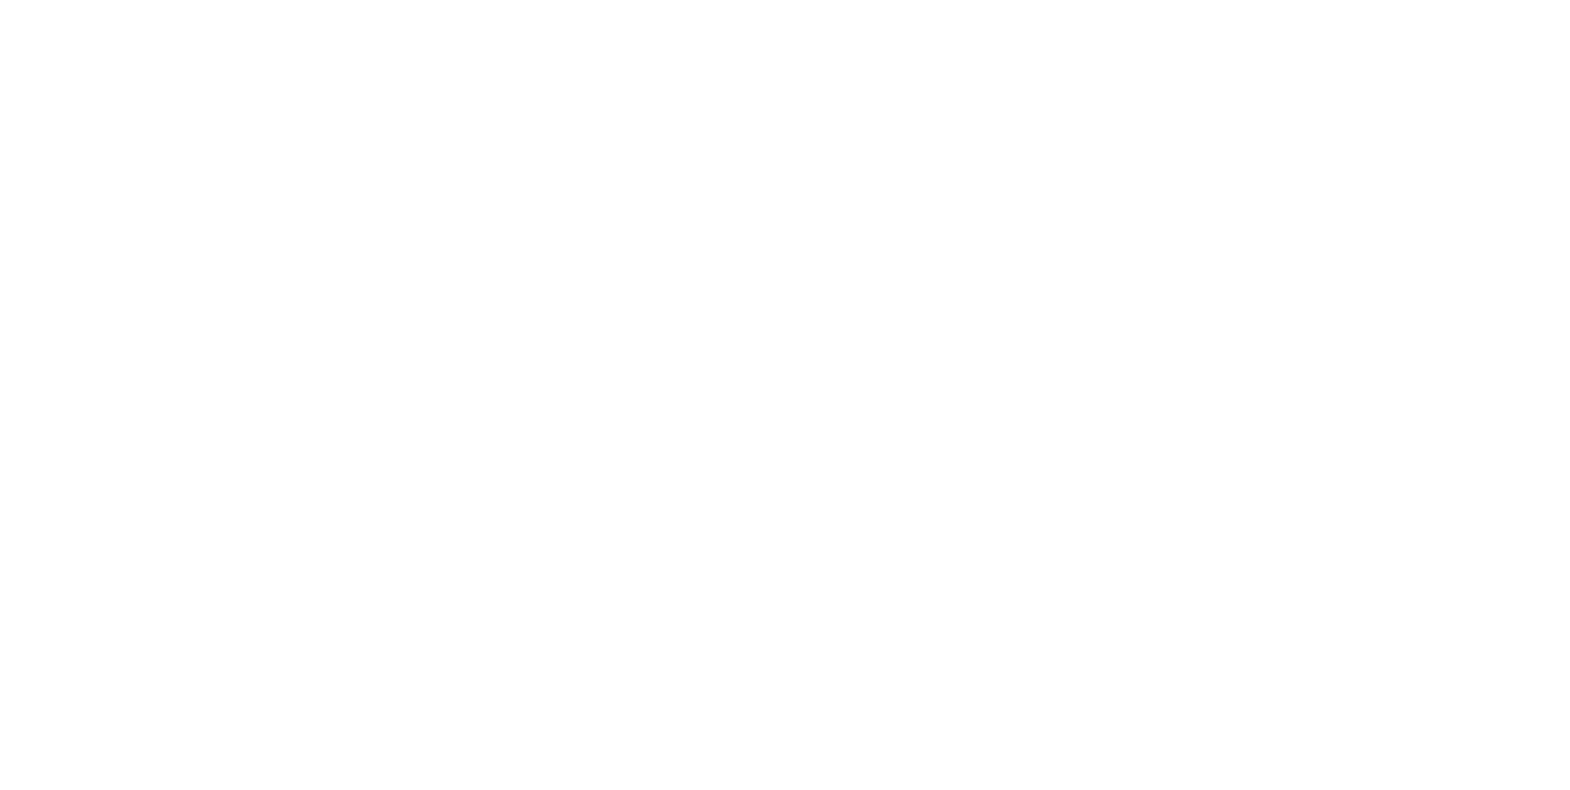

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_test.columns, class_names=['Not Fraud', 'Fraud'])
plt.show()